**Needed Libraries:**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format


In [34]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

/kaggle/input/creditcardfraud/creditcard.csv
Path to dataset files: /kaggle/input/creditcardfraud


1. Understanding Dataset Properties
The first step is to get a clear picture of what’s inside the dataset by focusing on:

**Missing Values Check:**

Identify if any data is missing and whether it needs to be handled or removed.
**Class Imbalance Analysis:**

Check how many transactions are fraudulent vs. normal (legitimate). Fraud cases are usually rare compared to normal ones.
**Basic Statistics:**

Get an overview of the data, including averages, minimum/maximum values, and how spread out the data is (standard deviation).
2. Exploratory Data Analysis (EDA)
EDA helps to visualize and understand data patterns. Some key techniques include:

**Summary Statistics:**

Look at key figures like mean, median, and percentiles to understand how transaction amounts and time behave.
**Feature Distributions:**

Visualize how transaction amounts and other variables (V1 to V28) are spread across the dataset using histograms or density plots.
**Class Distribution Visualization:**

Compare the number of fraudulent vs. non-fraudulent transactions using charts to highlight class imbalance.
**Outlier Detection:**

Identify transactions with unusual amounts or patterns that could indicate potential fraud.
**Correlation Analysis:**

Examine relationships between different features to identify which ones may be useful in detecting fraud.
**Feature Importance:**

Investigate which features contribute the most to identifying fraudulent transactions.


In [35]:
ds=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
ds=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [38]:
ds.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

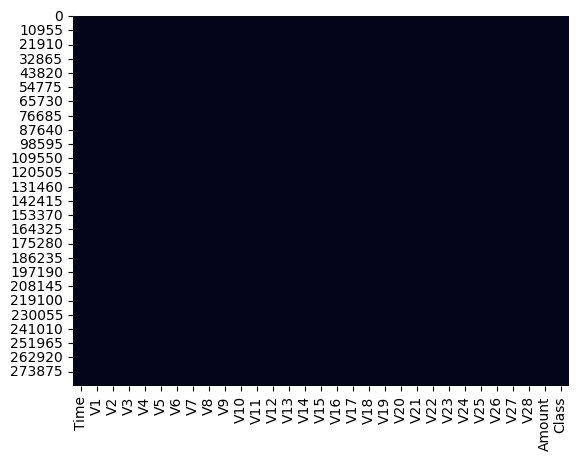

In [24]:
sns.heatmap(ds.isnull() , cbar=False )

**No missing Values.**

In [25]:
ds_class=ds["Class"].value_counts()
print("The percentage of non fraude transactions is" , ds_class[0]*100/len(ds))
print("The percentage of fraude transactions is" , ds_class[1]*100/len(ds))


The percentage of non fraude transactions is 99.827251436938
The percentage of fraude transactions is 0.1727485630620034


**Conclusion** 
There are no missing Data in all variable 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


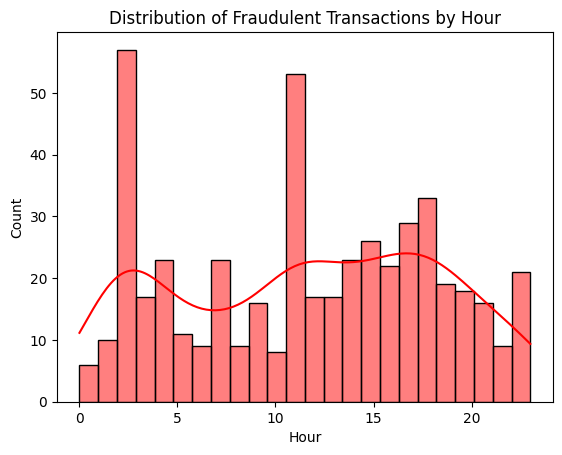

In [26]:
ds['Hour'] = (ds['Time'] // 3600) % 24

fraud_ds = ds[ds['Class'] == 1]

sns.histplot(data=fraud_ds, x='Hour', kde=True, bins=24, color='red')

plt.title('Distribution of Fraudulent Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


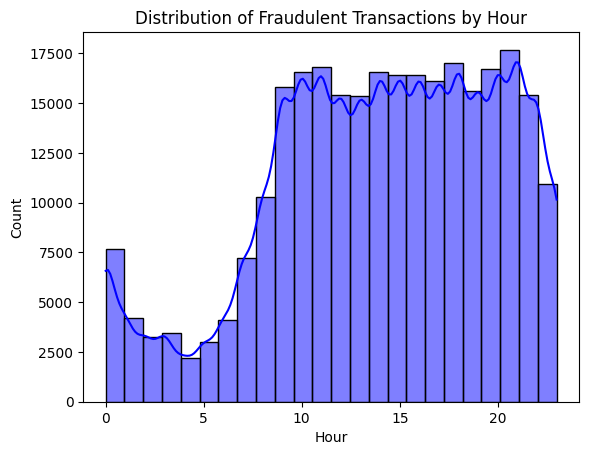

In [27]:
ds['Hour'] = (ds['Time'] // 3600) % 24

fraud_ds = ds[ds['Class'] == 0]

sns.histplot(data=fraud_ds, x='Hour', kde=True, bins=24, color='blue')

plt.title('Distribution of Fraudulent Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [28]:
nonfraud=ds[ds["Class"]==0].describe().T
fraud=ds[ds["Class"]==1].describe().T


Text(0.5, 1.0, 'non fraud mean')

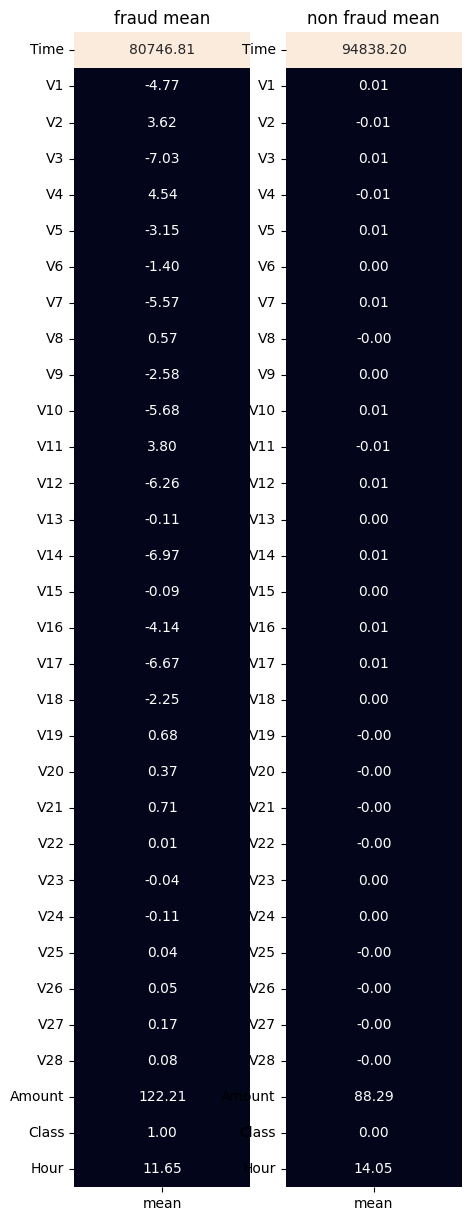

In [29]:
fix,ax=plt.subplots(nrows=1, ncols=2 , figsize=(5,15) )

plt.subplot(1,2,1)
sns.heatmap(fraud[["mean"]] , annot=True , cbar = False , fmt=".2f")
plt.title('fraud mean')

plt.subplot(1,2,2)
sns.heatmap(nonfraud[["mean"]] , annot=True , cbar = False , fmt=".2f")
plt.title('non fraud mean')


the graph represents the fraud and non fraud sampling mean, were we can see the following :
the Mean for the variables **v1-v28** for fraud transactions are almost all **0**
the mean amount for **fraud transaction 88.29** is less than **non fraud 122.21** transactions 
the times for **fraud transactions** is **more** than **non fraud** transactions


**Feature Selection:** 

<Axes: >

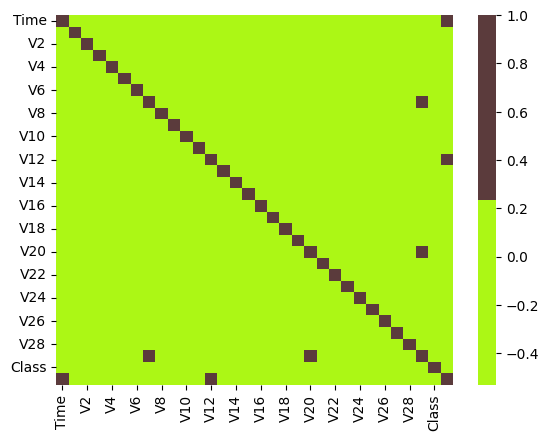

In [30]:
sns.heatmap(ds.corr() , cmap=['#ACF715','#5B3B3C'])

In [31]:
correlation=ds.corrwith(ds["Class"]).sort_values(ascending=False).to_frame()
correlation.columns=["Correlation"]


<Axes: >

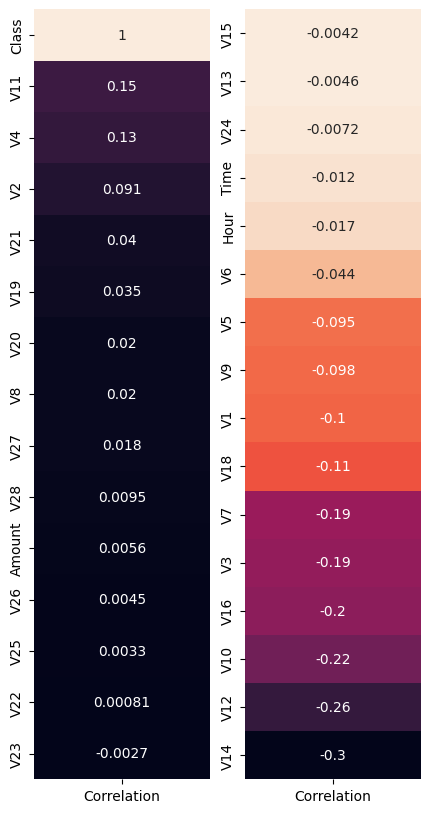

In [32]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(5,10))

plt.subplot(1,2,1)
sns.heatmap(correlation.iloc[:15,:],annot=True , cbar=False),
plt.subplot(1,2,2)
sns.heatmap(correlation.iloc[15:31], annot=True , cbar=False)

For feature selection, we will exclude the features having correlation values between **[-0.1,0.1]**.
**V4, V11** are positively correlated and **V7, V3, V16, V10, V12, V14, V17** are negatively correlated with the Class feature.

**New Table:**

In [40]:
ds2=ds[[ 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17','V4' , 'V11', 'Class']]

In [41]:
ds2.head()

,V7,V3,V16,V10,V12,V14,V17,V4,V11,Class
0,0.24,2.54,-0.47,0.09,-0.62,-0.31,0.21,1.38,-0.55,0
1,-0.08,0.17,0.46,-0.17,1.07,-0.14,-0.11,0.45,1.61,0
2,0.79,1.77,-2.89,0.21,0.07,-0.17,1.11,0.38,0.62,0
3,0.24,1.79,-1.06,-0.05,0.18,-0.29,-0.68,-0.86,-0.23,0
4,0.59,1.55,-0.45,0.75,0.54,-1.12,-0.24,0.40,-0.82,0


In [43]:
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

In [51]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.06)

X = ds2.iloc[:, :9].values
y = ds2.iloc[:, 9].values

steps = [("under", under), ("over", over)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

print(Counter(y)) 


Counter({0: 8200, 1: 4100})


#   Model Building

In [52]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)


In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

## 1-XGBOOST

In [54]:
 
model= XGBClassifier()
model.fit(x_train , y_train) 

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1630   14]
 [  17  799]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1644
           1       0.98      0.98      0.98       816

    accuracy                           0.99      2460
   macro avg       0.99      0.99      0.99      2460
weighted avg       0.99      0.99      0.99      2460



## 2-Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train , y_train) 

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1627   17]
 [  96  720]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1644
           1       0.98      0.88      0.93       816

    accuracy                           0.95      2460
   macro avg       0.96      0.94      0.95      2460
weighted avg       0.96      0.95      0.95      2460



## 3. K-Nearest Neighbors


In [60]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(x_train , y_train) 

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1601   43]
 [   6  810]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1644
           1       0.95      0.99      0.97       816

    accuracy                           0.98      2460
   macro avg       0.97      0.98      0.98      2460
weighted avg       0.98      0.98      0.98      2460

